# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
renda = pd.read_csv('previsao_renda.csv')
renda.head()

,Unnamed: 0,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,3369.24
1,1,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,6096.14
2,2,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,5658.98
3,3,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,7246.69
4,4,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,4017.37


In [3]:
renda.dtypes

Unnamed: 0                 int64
data_ref                  object
sexo                      object
posse_de_veiculo            bool
posse_de_imovel             bool
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
renda                    float64
dtype: object

In [4]:
# transformando data_ref (object) para datetime
renda['data_ref'] = pd.to_datetime(renda.data_ref)


In [5]:
renda.dtypes

Unnamed: 0                        int64
data_ref                 datetime64[ns]
sexo                             object
posse_de_veiculo                   bool
posse_de_imovel                    bool
qtd_filhos                        int64
tipo_renda                       object
educacao                         object
estado_civil                     object
tipo_residencia                  object
idade                             int64
tempo_emprego                   float64
qt_pessoas_residencia           float64
renda                           float64
dtype: object

In [6]:
# Renda e Educação
tabela = pd.crosstab(renda['data_ref'], renda['educacao'])
tabela.div(tabela.sum(axis=1), axis=0)

educacao,Primário,Pós graduação,Secundário,Superior completo,Superior incompleto
data_ref,,,,,
2015-01-01,0.012,0.000,0.684,0.262,0.042
2015-02-01,0.022,0.001,0.671,0.265,0.041
2015-03-01,0.013,0.003,0.682,0.254,0.048
2015-04-01,0.014,0.001,0.682,0.262,0.041
2015-05-01,0.009,0.003,0.682,0.274,0.032
2015-06-01,0.009,0.001,0.678,0.274,0.038
2015-07-01,0.010,0.003,0.671,0.275,0.041
2015-08-01,0.014,0.001,0.678,0.265,0.042
2015-09-01,0.013,0.001,0.517,0.428,0.041


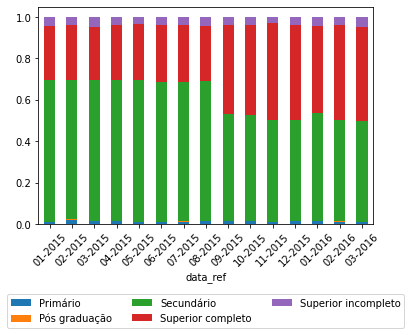

In [7]:
# Renda x Educação
tab_freq = pd.crosstab(renda['data_ref'],renda['educacao'])
tabela = tab_freq.div(tabela.sum(axis = 1), axis = 0)
ax = tabela.plot.bar(stacked = True)
tick_labs = renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=45)
plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)


Pelo gráfico acima, pode-se notar que não houve mudança significativa ao longo do tempo com relação ao nível de escolaridade

In [8]:
# Renda e Estado Civil
tab_civil = pd.crosstab(renda['data_ref'], renda['estado_civil'])
tab_civil.div(tab_civil.sum(axis=1), axis=0)

estado_civil,Casado,Separado,Solteiro,União,Viúvo
data_ref,,,,,
2015-01-01,0.683,0.051,0.128,0.087,0.051
2015-02-01,0.708,0.043,0.130,0.070,0.049
2015-03-01,0.692,0.058,0.130,0.072,0.048
2015-04-01,0.684,0.057,0.132,0.084,0.043
2015-05-01,0.699,0.060,0.113,0.081,0.047
2015-06-01,0.715,0.045,0.110,0.079,0.051
2015-07-01,0.708,0.051,0.113,0.080,0.048
2015-08-01,0.716,0.059,0.113,0.070,0.042
2015-09-01,0.715,0.048,0.110,0.078,0.049


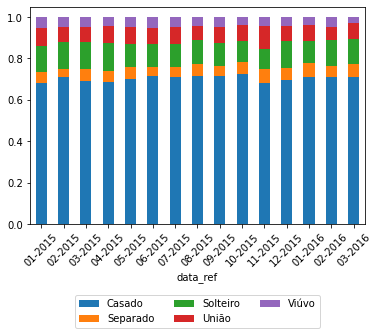

In [9]:
# Renda x Estado Civil
tab_freq2 = pd.crosstab(renda['data_ref'], renda['estado_civil'])
tab_civil = tab_freq2.div(tab_civil.sum(axis = 1), axis=0)
ax = tab_civil.plot.bar(stacked = True)
tick_labs = renda['data_ref'].map(lambda ts: ts.strftime('%m-%Y')).unique()

ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=45)
plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3);

O gráfico acima mostra que não houve mudança significativa no estado civil com o decorrer do tempo

In [10]:
# Renda x Tipo de renda
tab_tipo_renda = pd.crosstab(renda['data_ref'], renda['tipo_renda'])
tab_tipo_renda.div(tab_tipo_renda.sum(axis = 1), axis = 0)

tipo_renda,Assalariado,Bolsista,Empresário,Pensionista,Servidor público
data_ref,,,,,
2015-01-01,0.536,0.000,0.218,0.159,0.087
2015-02-01,0.522,0.002,0.204,0.174,0.098
2015-03-01,0.525,0.001,0.201,0.171,0.102
2015-04-01,0.517,0.000,0.210,0.180,0.093
2015-05-01,0.509,0.000,0.233,0.152,0.106
2015-06-01,0.527,0.000,0.201,0.185,0.087
2015-07-01,0.505,0.000,0.217,0.187,0.091
2015-08-01,0.516,0.000,0.222,0.190,0.072
2015-09-01,0.518,0.000,0.229,0.169,0.084


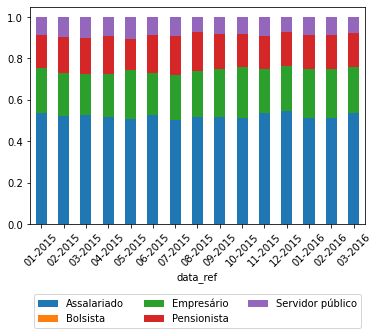

In [11]:
# Renda x Tipo de Renda
tab_freq3 = pd.crosstab(renda['data_ref'], renda['tipo_renda'])
tab_tipo_renda = tab_freq3.div(tab_tipo_renda.sum(axis = 1), axis=0)

ax = tab_tipo_renda.plot.bar(stacked = True)
tick_labs = renda['data_ref'].map(lambda ts: ts.strftime('%m-%Y')).unique()

ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=45)
plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3);

Mais uma vez, o gráfico nos mostra que não houve alteração no timpo de renda ao longo do tempo

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

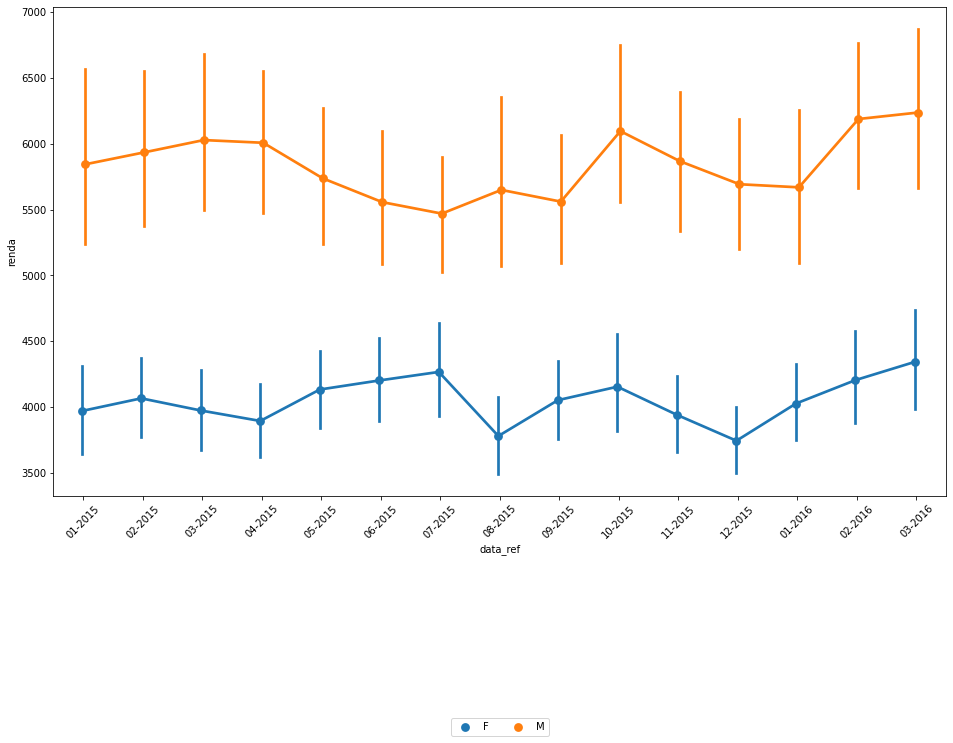

In [12]:
# Variável Sexo
plt.figure(figsize=(16,9))
ax = sns.pointplot(x='data_ref', y='renda', hue='sexo', data=renda, dodge=True, ci=95)
plt.legend(loc = 'lower center', bbox_to_anchor = (0.5, -.30),ncol = 3)
tick_labs = renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=45)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

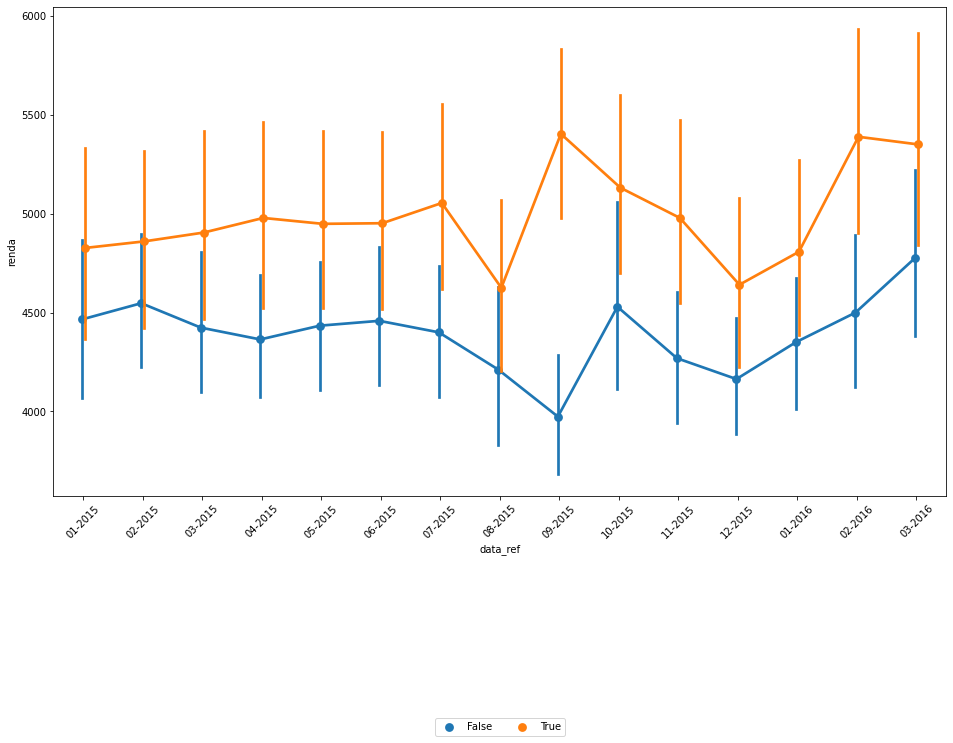

In [13]:
# Variável Posse de veículo
plt.figure(figsize=(16,9))
ax = sns.pointplot(x='data_ref', y='renda', hue='posse_de_veiculo', data=renda, dodge=True, ci=95)
plt.legend(loc = 'lower center', bbox_to_anchor = (0.5, -.30),ncol = 3)
tick_labs = renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=45)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

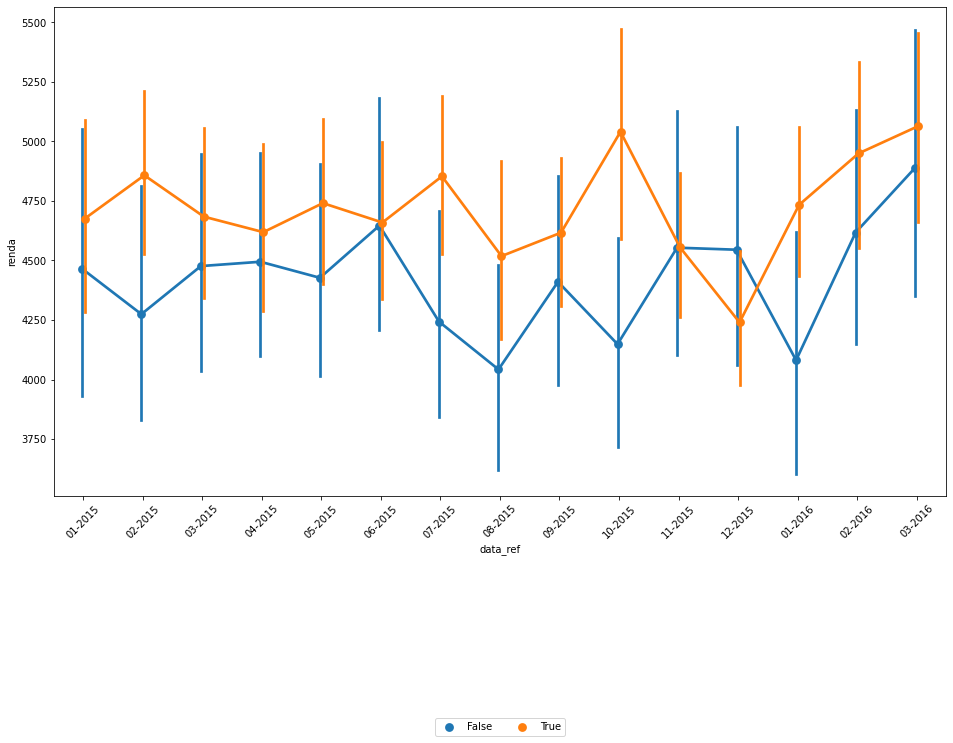

In [14]:
# Posse de Imóvel
plt.figure(figsize=(16,9))
ax = sns.pointplot(x='data_ref', y='renda', hue='posse_de_imovel', data=renda, dodge=True, ci=95)
plt.legend(loc = 'lower center', bbox_to_anchor = (0.5, -.30),ncol = 3)
tick_labs = renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=45)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)


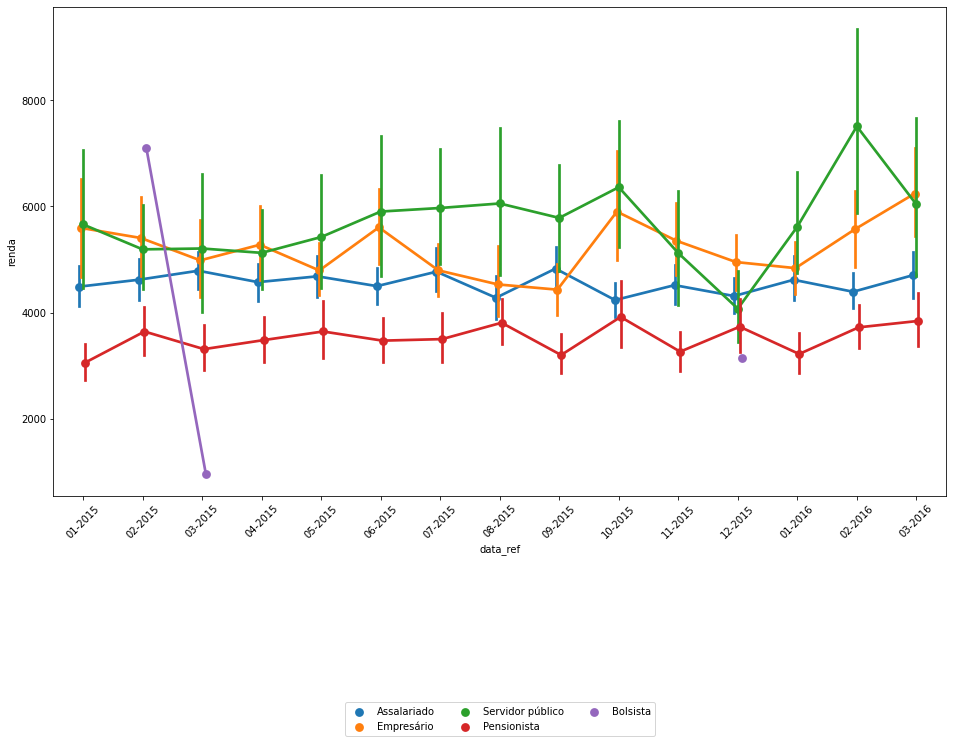

In [15]:
# Tipo de Renda
plt.figure(figsize=(16,9))
ax = sns.pointplot(x='data_ref', y='renda', hue='tipo_renda', data=renda, dodge=True, ci=95)
plt.legend(loc = 'lower center', bbox_to_anchor = (0.5, -.30),ncol = 3)
tick_labs = renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=45)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3);

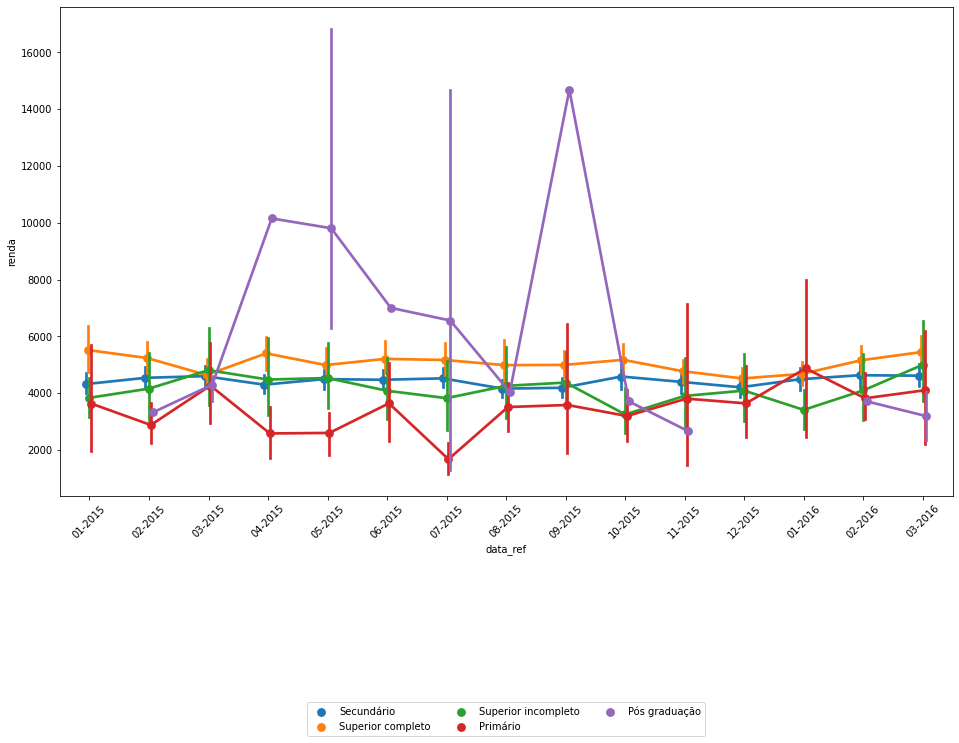

In [16]:
# Educação
plt.figure(figsize=(16,9))
ax = sns.pointplot(x='data_ref', y='renda', hue='educacao', data=renda, dodge=True, ci=95)
plt.legend(loc = 'lower center', bbox_to_anchor = (0.5, -.30),ncol = 3)
tick_labs = renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=45)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3);

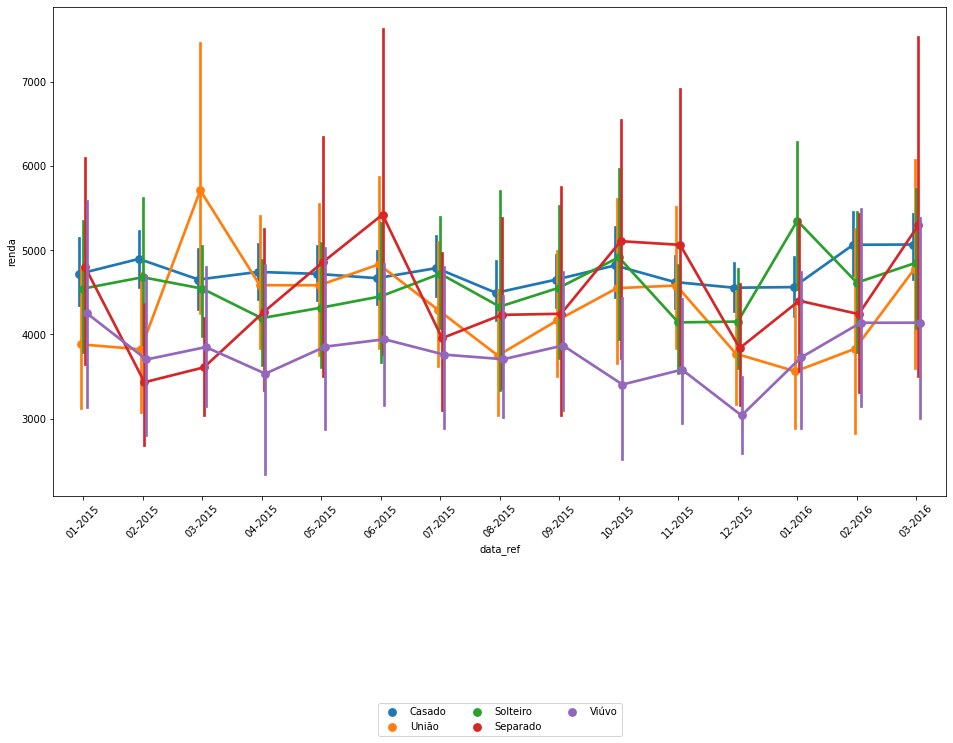

In [17]:
# Estado Civil
plt.figure(figsize=(16,9))
ax = sns.pointplot(x='data_ref', y='renda', hue='estado_civil', data=renda, dodge=True, ci=95)
plt.legend(loc = 'lower center', bbox_to_anchor = (0.5, -.30),ncol = 3)
tick_labs = renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=45)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3);

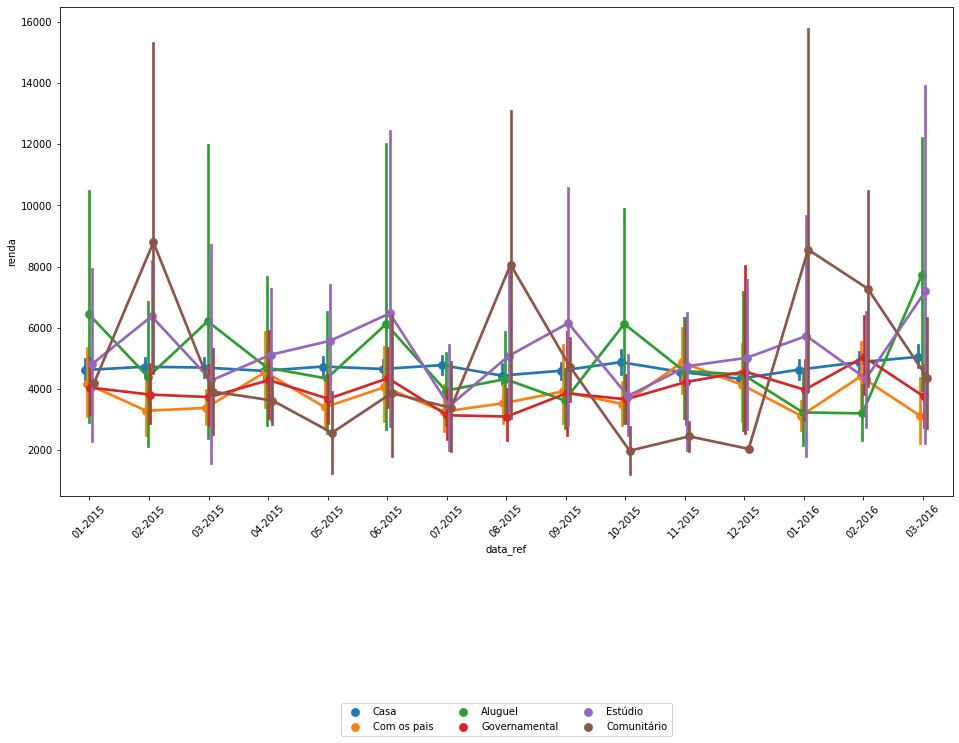

In [18]:
# Tipo Residência
plt.figure(figsize=(16,9))
ax = sns.pointplot(x='data_ref', y='renda', hue='tipo_residencia', data=renda, dodge=True, ci=95)
plt.legend(loc = 'lower center', bbox_to_anchor = (0.5, -.30),ncol = 3)
tick_labs = renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=45)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3);

Ao longo do tempo, houve uma alteração importante com relação ao nível de educação x renda e com relação ao tipo de residência, que merecem uma análise mais aprofundada.
<p>As outras variáveis qualitativas não se alteraram ao longo do tempo, a ponto de merecerem uma análise mais minuciosa.</p>